In [1]:
# Setup

import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F

from customModel import *

In [2]:
device = 'cuda:0'
inputs = np.load('./inputs.npy')

inputs[:, 0] = inputs[:, 0].astype('uint8') / 255
inputs[:, 1] = (inputs[:, 1] * 255).astype('uint8') / 255

outputs = np.load('./outputs.npy')

print(inputs.shape, outputs.shape)

(100, 2, 512, 512) (100, 4, 512, 512)


In [3]:
# Build Model

num_classes = 4
batch_size, channel, height, width = inputs.shape
x = torch.Tensor(inputs[:1])
vit = ViT(in_channels=channel, num_classes=num_classes)
vit = torch.load('models/20221125_154012_149_0.7814_0.7769_4.pt', map_location=device).to(device)
print("Model Implemented!")

Model Implemented!


In [4]:
# custom dataset
dataset = customDataset(X=inputs, Y=outputs)

OutOfMemoryError: CUDA out of memory. Tried to allocate 66.00 MiB (GPU 0; 79.20 GiB total capacity; 3.36 GiB already allocated; 13.31 MiB free; 3.47 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

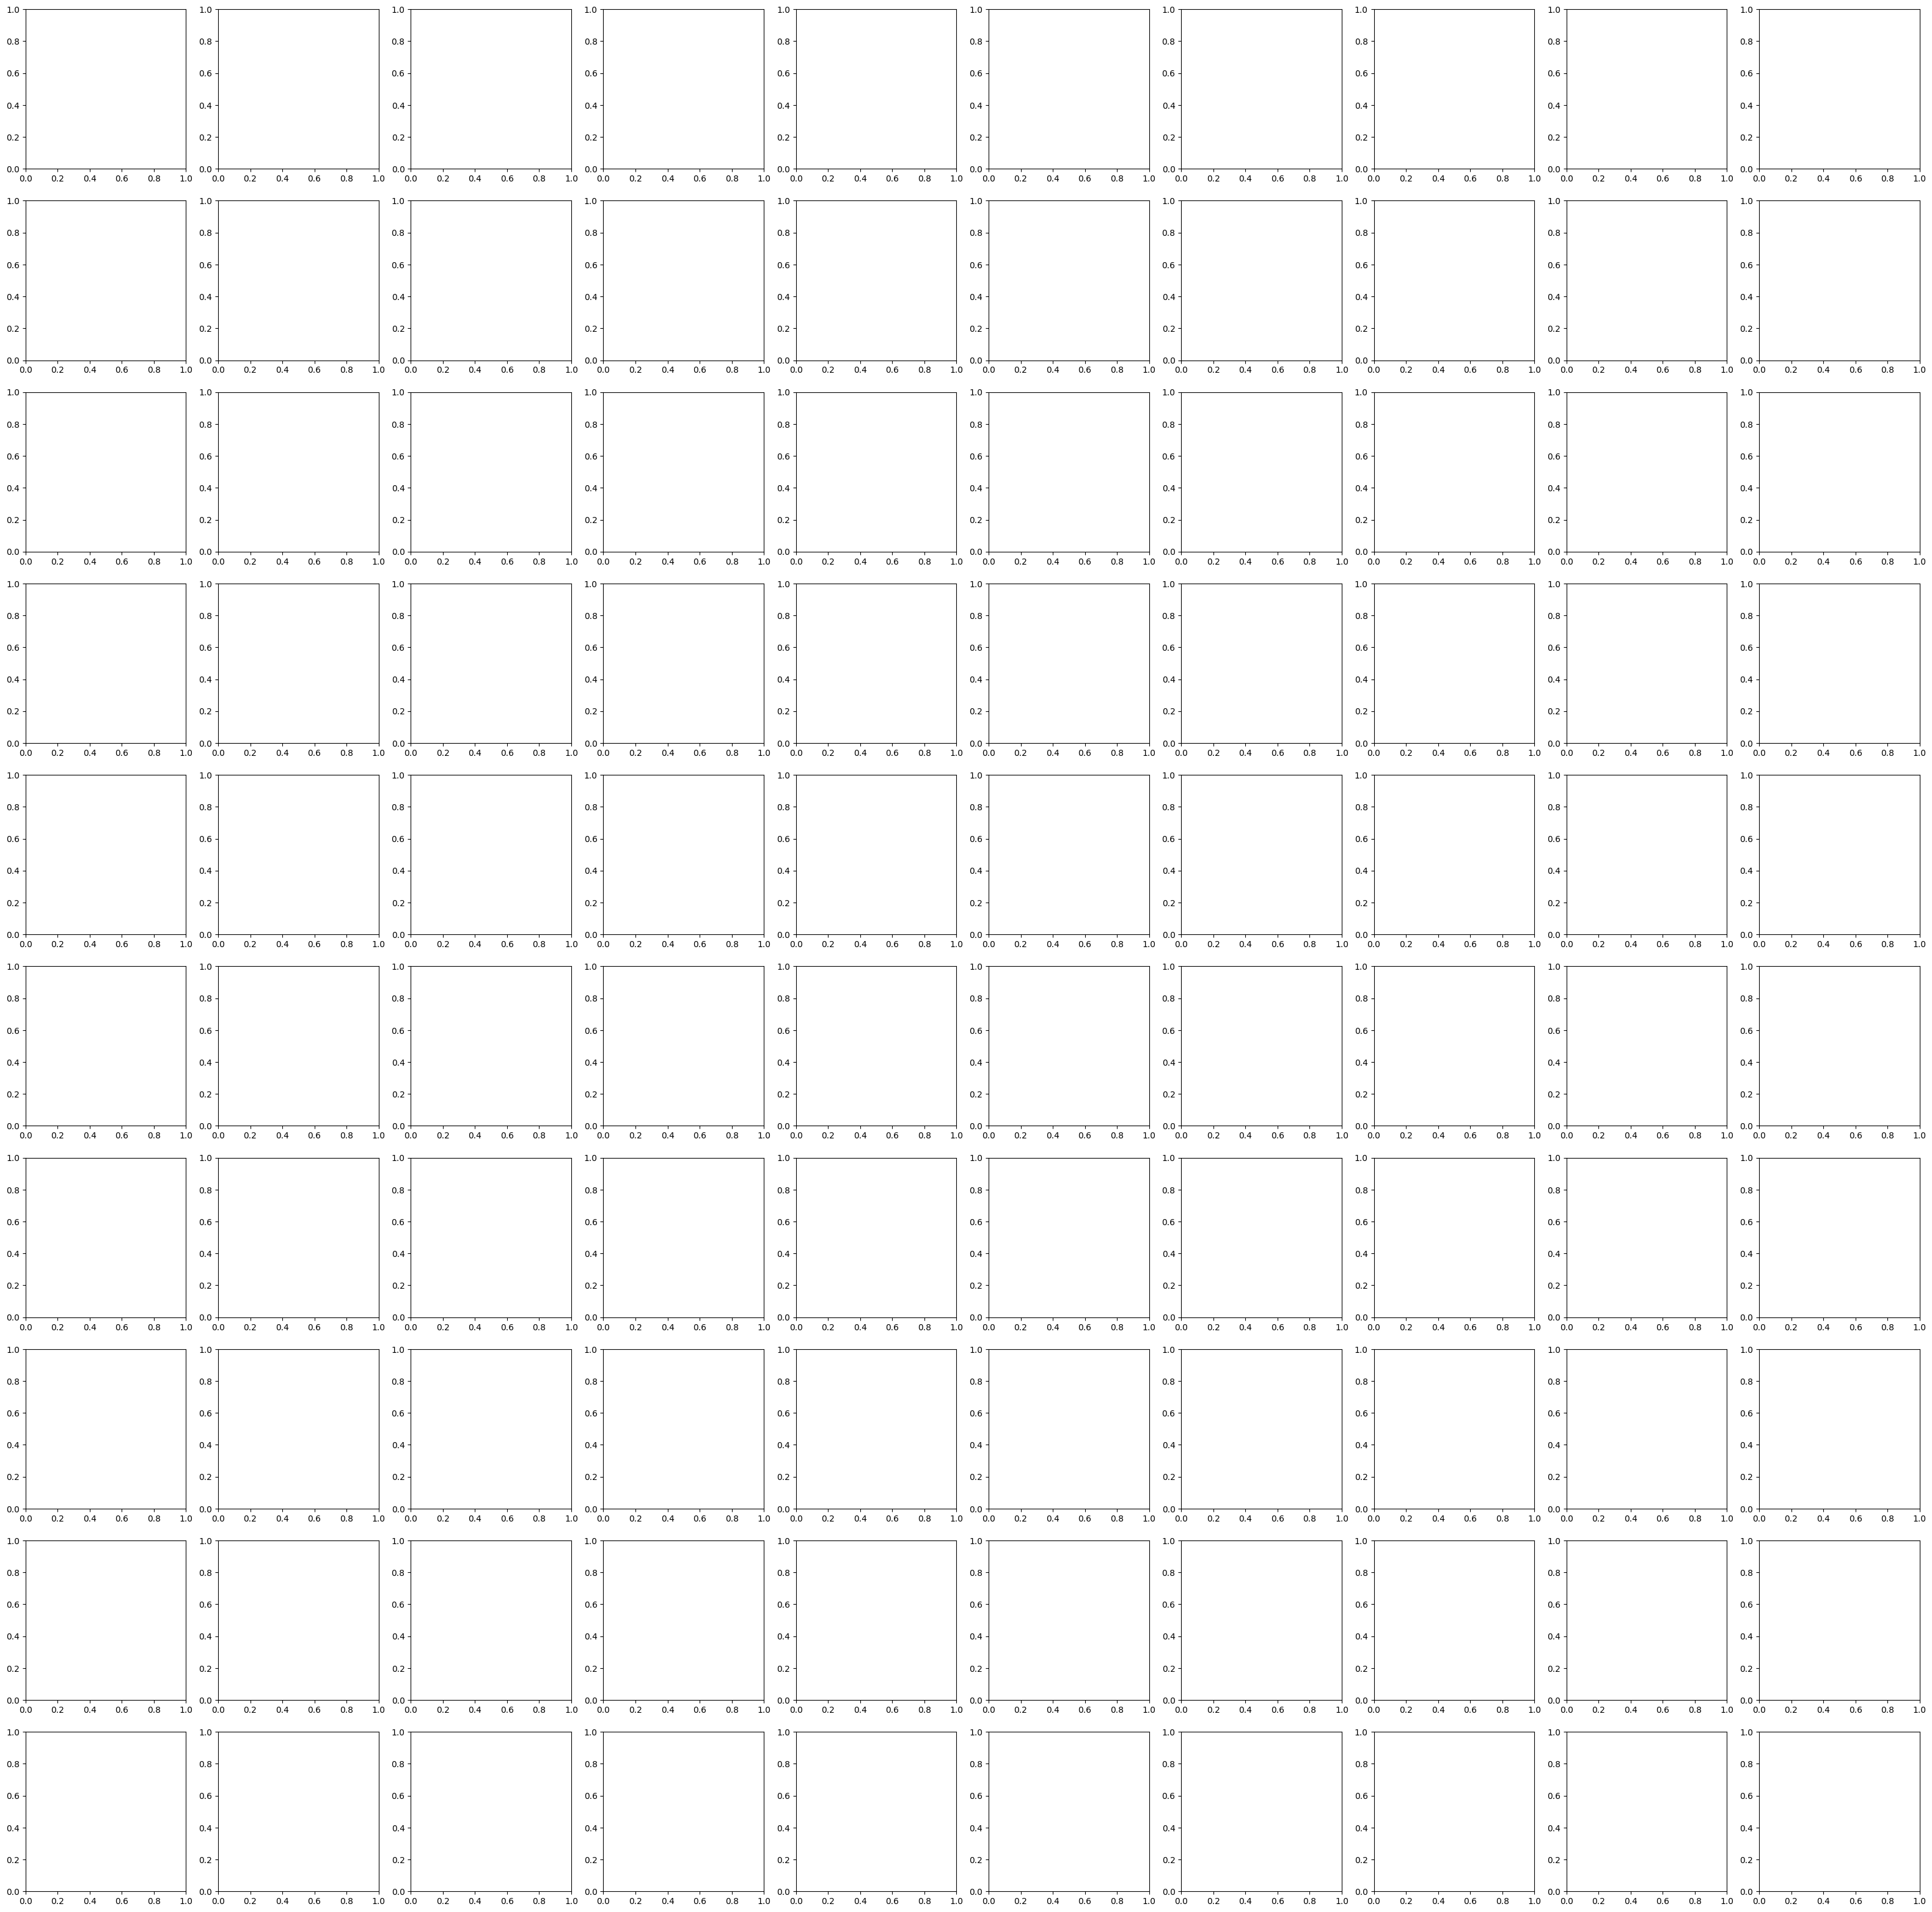

In [6]:
dataLen = 10
dataSize = 10

fig, axes = plt.subplots(dataLen, dataSize, figsize=(dataLen*4, dataSize*4))

data_choices = np.random.choice(range(len(dataset)), size=dataLen)
num = 0
data_choice = data_choices[num]
x, y = dataset[data_choice]
x = x.unsqueeze(0).to(device)
pred = vit(x).cpu().detach().numpy().squeeze()

x2 = x.cpu().detach().numpy().squeeze()
y2 = y.cpu().detach().numpy().squeeze()

for idx, ax in enumerate(axes.flat) :

    if (idx > 0) & (idx % dataSize == 0) :
        num += 1
        data_choice = data_choices[num]
        x, y = dataset[data_choice]
        x = x.unsqueeze(0).to(device)
        pred = vit(x).cpu().detach().numpy().squeeze()
    
        x2 = x.cpu().detach().numpy().squeeze()
        y2 = y.cpu().detach().numpy().squeeze()    
    
    if idx % dataSize < 2 :
        ax.imshow(x2[idx-num*dataSize], cmap="gray")
        title = f'Input {idx+1-num*dataSize}'
        ax.set_title(title)
        ax.axis("off")
    elif idx % dataSize < 6 :
        ax.imshow(y2[idx-2-num*dataSize], cmap="gray")
        title = f'Label {idx-2-num*dataSize}'
        ax.set_title(title)
        ax.axis("off")
    else :
        ax.imshow(pred[idx-6-num*dataSize].astype('uint8')*255, 'gray')
        title = f'pred {idx-6-num*dataSize}'
        ax.set_title(title)
        ax.axis("off")

# Print information and display the figure.
print(f"Displaying Train Results")
plt.show()